In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
data_payment = pd.read_csv('data\olist_order_payments_dataset.csv')

In [91]:
data_payment.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [92]:
'No tenemos la más remota idea qué será esta columna'

data_payment.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

In [93]:
'Ni esta'

data_payment.payment_sequential.unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [94]:
'No hay duplicados'

data_payment.duplicated().sum()

0

In [95]:
'No hay faltantes'

data_payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


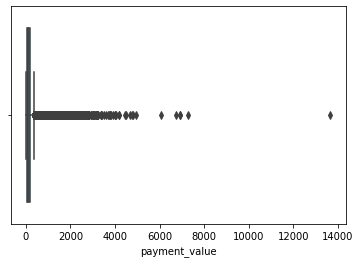

In [96]:
sns.boxplot('payment_value', data= data_payment)
plt.show()

Es tanta la gama de productos que deben vender, que estos outliers no tendrían por qué ser un error.

Un tv puede salir 14000 reales

unpopular opinion: no eliminarlos

In [97]:
'Casi 8 mil outliers para el precio'

Q1 = data_payment['payment_value'].quantile(0.25)
Q3 = data_payment['payment_value'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = (data_payment['payment_value']<BI) | (data_payment['payment_value']>BS) 
print(out.sum())

7981


In [98]:
print('El porcentaje de outliers es:',(out.sum() / data_payment.shape[0]) * 100)

El porcentaje de outliers es: 7.682459619197966


+ Normalizar el campo 'payment_type'
+ Averiguar qué son 'payment_sequential' y 'payment_installments' porque no tenemos idea
+ Reemplazar Boleto por Voucher en tabla payment_type

In [99]:
data_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [100]:
data_payment['payment_type'] = data_payment['payment_type'].replace('boleto', 'voucher')

In [103]:
data_payment.to_parquet('dataparquet\data_paymentP')